In [1]:
# basic import statements
import os
import re
import gc
import warnings
import numpy as np
import pandas as pd
import collections
warnings.filterwarnings("ignore")
from datetime import date 

#set max display in notebook
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#Show multiple output in console
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [15]:
# reading the dataset 
df = pd.read_csv('amazon_reviews_us_Apparel_v1_00.tsv', sep = '\t',  error_bad_lines=False)
df.shape
df.head()

b'Skipping line 49396: expected 15 fields, saw 22\nSkipping line 57008: expected 15 fields, saw 22\n'
b'Skipping line 82075: expected 15 fields, saw 22\nSkipping line 104435: expected 15 fields, saw 22\nSkipping line 109766: expected 15 fields, saw 22\nSkipping line 124024: expected 15 fields, saw 22\nSkipping line 129914: expected 15 fields, saw 22\nSkipping line 130172: expected 15 fields, saw 22\n'
b'Skipping line 161515: expected 15 fields, saw 22\n'
b'Skipping line 230464: expected 15 fields, saw 22\n'
b'Skipping line 292640: expected 15 fields, saw 22\nSkipping line 293681: expected 15 fields, saw 22\nSkipping line 316511: expected 15 fields, saw 22\nSkipping line 317239: expected 15 fields, saw 22\nSkipping line 326099: expected 15 fields, saw 22\nSkipping line 327595: expected 15 fields, saw 22\n'
b'Skipping line 342645: expected 15 fields, saw 22\nSkipping line 347980: expected 15 fields, saw 22\nSkipping line 376258: expected 15 fields, saw 22\nSkipping line 381192: expected 

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,32158956,R1KKOXHNI8MSXU,B01KL6O72Y,24485154,Easy Tool Stainless Steel Fruit Pineapple Core...,Apparel,4.0,0.0,0.0,N,Y,★ THESE REALLY DO WORK GREAT WITH SOME TWEAKING ★,"These Really Do Work Great, But You Do Need To...",2013-01-14
1,US,2714559,R26SP2OPDK4HT7,B01ID3ZS5W,363128556,V28 Women Cowl Neck Knit Stretchable Elasticit...,Apparel,5.0,1.0,2.0,N,Y,Favorite for winter. Very warm!,I love this dress. Absolute favorite for winte...,2014-03-04
2,US,12608825,RWQEDYAX373I1,B01I497BGY,811958549,James Fiallo Men's 12-Pairs Low Cut Athletic S...,Apparel,5.0,0.0,0.0,N,Y,Great Socks for the money.,"Nice socks, great colors, just enough support ...",2015-07-12
3,US,25482800,R231YI7R4GPF6J,B01HDXFZK6,692205728,Belfry Gangster 100% Wool Stain-Resistant Crus...,Apparel,5.0,0.0,0.0,N,Y,Slick hat!,"I bought this for my husband and WOW, this is ...",2015-06-03
4,US,9310286,R3KO3W45DD0L1K,B01G6MBEBY,431150422,JAEDEN Women's Beaded Spaghetti Straps Sexy Lo...,Apparel,5.0,0.0,0.0,N,Y,I would do it again!,Perfect dress and the customer service was awe...,2015-06-12


(5881874, 15)

### Content
##### marketplace:- 2 letter country code of the marketplace where the review was written.
##### customer_id:- Random identifier that can be used to aggregate reviews written by a single author.
##### review_id:- The unique ID of the review.
##### product_id:- The unique Product ID the review pertains to. In the multilingual dataset the reviews for the same product in different countries can be grouped by the same product_id.
##### product_parent:- Random identifier that can be used to aggregate reviews for the same product.
##### product_title:- Title of the product.
##### product_category:- Broad product category that can be used to group reviews(also used to group the dataset into coherent parts).
##### star_rating:- The 1-5 star rating of the review.
##### helpful_votes:- Number of helpful votes.
##### total_votes:- Number of total votes the review received.
##### vine:- Review was written as part of the Vine program.
##### verified_purchase:- The review is on a verified purchase.
##### review_headline:- The title of the review.
##### review_body:- The review text.
##### review_date:- The date the review was written.

### Understanding the dataset 

In [20]:
df.dtypes

marketplace           object
customer_id            int64
review_id             object
product_id            object
product_parent         int64
product_title         object
product_category      object
star_rating          float64
helpful_votes        float64
total_votes          float64
vine                  object
verified_purchase     object
review_headline       object
review_body           object
review_date           object
dtype: object

In [24]:
# converting the object to datetime 
df['review_date'] = pd.to_datetime(df['review_date'])

In [4]:
# getting to know the count 
df.product_category.value_counts()

Apparel       5881873
2011-08-04          1
Name: product_category, dtype: int64

In [16]:
# checking if there are any NULLS 
df['product_title'].isnull().sum()
df[df['product_title'].isnull()]

12

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
2057069,US,31066166,RXOXMCG7FC6H9,B00FRHQ8DE,226468496,NaN,Apparel,4.0,0.0,0.0,N,Y,nice tee.,5 Y.O. loves this. washes well. nice tee.,2015-08-13
3456219,US,11676819,R1UZ28EB5L4J2X,B0091K6J5U,874311479,NaN,Apparel,4.0,0.0,0.0,N,Y,Looked great!,My family and I all went as a group of Ninja T...,2013-11-14
4266530,US,22298646,R3JBU6LK2H6RVP,B005HBC4GK,172240882,NaN,Apparel,5.0,0.0,0.0,N,Y,wow..love love love it,I bought one mudium size wallet before..Love i...,2013-09-05
4574558,US,24125287,R1VQNEGPSTLIZT,B004L6S3P8,957973758,NaN,Apparel,5.0,7.0,7.0,N,Y,"BEST PAJAMAS I HAVE EVER GIVEN MY LADY, TRUST ...","SILKY SMOOTH BEST EVER, PACKAGING WAS BAUTIFUL...",2011-09-18
4574559,US,11312068,RBT8FHIIMWYXB,B004L6S3P8,957973758,NaN,Apparel,5.0,1.0,1.0,N,Y,Winning!!,This was a gift for my girlfriend (although I ...,2012-01-17
4574560,US,22681496,RM7C2WEXDG8I3,B004L6S3P8,957973758,NaN,Apparel,5.0,1.0,1.0,N,Y,Completly exceeded my expectations!,The pajama's came in a beautiful box. The com...,2011-03-17
4574653,US,19052279,R1YJKPR1514ASV,B004L6NDKI,303715829,NaN,Apparel,5.0,1.0,1.0,N,Y,silk pajamas,Very comfortable thankyou Although the sleeves...,2011-10-03
4574654,US,40404975,R3FI6MBA3E7KF6,B004L6NDGW,858482646,NaN,Apparel,4.0,2.0,3.0,N,Y,I love silk!,"The silk pj's I purchased are lovely, but a li...",2011-12-21
4954464,US,52729995,R1BZ32ZOPBINJH,B003690PPM,272676701,NaN,Apparel,5.0,0.0,0.0,N,Y,LOVE These socks! Better than the johnny's,I LOVE these socks. I have gotten SO many comp...,2011-04-04
5138255,US,44564829,R30UUMOZKBRRXX,B002E79P12,850795213,NaN,Apparel,5.0,0.0,0.0,N,Y,Awesome!,This is a great costume with a great fit. I wa...,2013-11-14


In [17]:
# checking if there are any NULLS 
df['product_title'].isna().sum()
df[df['product_title'].isna()]

12

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
2057069,US,31066166,RXOXMCG7FC6H9,B00FRHQ8DE,226468496,NaN,Apparel,4.0,0.0,0.0,N,Y,nice tee.,5 Y.O. loves this. washes well. nice tee.,2015-08-13
3456219,US,11676819,R1UZ28EB5L4J2X,B0091K6J5U,874311479,NaN,Apparel,4.0,0.0,0.0,N,Y,Looked great!,My family and I all went as a group of Ninja T...,2013-11-14
4266530,US,22298646,R3JBU6LK2H6RVP,B005HBC4GK,172240882,NaN,Apparel,5.0,0.0,0.0,N,Y,wow..love love love it,I bought one mudium size wallet before..Love i...,2013-09-05
4574558,US,24125287,R1VQNEGPSTLIZT,B004L6S3P8,957973758,NaN,Apparel,5.0,7.0,7.0,N,Y,"BEST PAJAMAS I HAVE EVER GIVEN MY LADY, TRUST ...","SILKY SMOOTH BEST EVER, PACKAGING WAS BAUTIFUL...",2011-09-18
4574559,US,11312068,RBT8FHIIMWYXB,B004L6S3P8,957973758,NaN,Apparel,5.0,1.0,1.0,N,Y,Winning!!,This was a gift for my girlfriend (although I ...,2012-01-17
4574560,US,22681496,RM7C2WEXDG8I3,B004L6S3P8,957973758,NaN,Apparel,5.0,1.0,1.0,N,Y,Completly exceeded my expectations!,The pajama's came in a beautiful box. The com...,2011-03-17
4574653,US,19052279,R1YJKPR1514ASV,B004L6NDKI,303715829,NaN,Apparel,5.0,1.0,1.0,N,Y,silk pajamas,Very comfortable thankyou Although the sleeves...,2011-10-03
4574654,US,40404975,R3FI6MBA3E7KF6,B004L6NDGW,858482646,NaN,Apparel,4.0,2.0,3.0,N,Y,I love silk!,"The silk pj's I purchased are lovely, but a li...",2011-12-21
4954464,US,52729995,R1BZ32ZOPBINJH,B003690PPM,272676701,NaN,Apparel,5.0,0.0,0.0,N,Y,LOVE These socks! Better than the johnny's,I LOVE these socks. I have gotten SO many comp...,2011-04-04
5138255,US,44564829,R30UUMOZKBRRXX,B002E79P12,850795213,NaN,Apparel,5.0,0.0,0.0,N,Y,Awesome!,This is a great costume with a great fit. I wa...,2013-11-14


In [18]:
df.star_rating.value_counts()

5.0    3306796
4.0    1142572
3.0     620868
1.0     443522
2.0     368115
Name: star_rating, dtype: int64

In [22]:
# installing the library for sentiment analysis
pip install textblob

     |████████████████████████████████| 636 kB 4.1 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


TextBlob is a Python library that provides a simple and intuitive interface for common natural language processing (NLP) tasks. It is built on top of NLTK (Natural Language Toolkit) and Pattern, and it offers a higher-level abstraction for tasks like text processing, sentiment analysis, part-of-speech tagging, language translation, and more. Here are a few key points about the TextBlob library:

1. **Ease of Use**: TextBlob is designed to be user-friendly and accessible, making it a great choice for beginners in NLP. Its API is straightforward and intuitive, allowing users to perform complex NLP tasks with just a few lines of code.

2. **Sentiment Analysis**: One of the prominent features of TextBlob is sentiment analysis. It can determine whether a piece of text expresses positive, negative, or neutral sentiment. This feature is useful for analyzing opinions, reviews, and social media content.

3. **Part-of-Speech Tagging**: TextBlob provides part-of-speech tagging, which involves categorizing words in a sentence as nouns, verbs, adjectives, adverbs, etc. This can be helpful for extracting insights about the grammatical structure of text.

4. **Noun Phrase Extraction**: TextBlob can extract noun phrases from text, which are sequences of words that represent a noun and its modifiers. This feature is useful for identifying key concepts and entities in a text.

5. **Language Translation and Detection**: TextBlob supports language translation between different languages and can automatically detect the language of a given text. It utilizes the Google Translate API for translation.

6. **Text Classification**: TextBlob includes a simple API for performing text classification tasks. While it may not be as advanced as some dedicated machine learning libraries, it can be useful for basic text categorization.

7. **Word and Phrase Tokenization**: TextBlob can tokenize text into words and sentences. This is a fundamental step in many NLP tasks, as it breaks down the input text into manageable units for further analysis.

8. **Pluralization and Singularization**: TextBlob can be used to pluralize or singularize words, which can be helpful for tasks like data preprocessing or generating text.

9. **Spell Checking and Correction**: The library offers spell checking and correction capabilities, allowing you to identify and correct spelling errors in text.

10. **Extensibility**: TextBlob is built on top of NLTK and Pattern, which means you can leverage their functionalities and extend TextBlob's capabilities with your own customizations.

While TextBlob is excellent for simple NLP tasks and quick analyses, it may not be suitable for more advanced or specialized NLP tasks that require fine-tuned models or in-depth linguistic analysis. However, its simplicity and ease of use make it a great tool for educational purposes, rapid prototyping, and basic text processing needs.

In [23]:
# importing the required libraries 
import pandas as pd
from textblob import TextBlob
from datetime import datetime

In [25]:
# Define a function to categorize sentiment
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

In [27]:
# Performing the sentiment analysis on review_headline and review_body
df['headline_sentiment'] = df['review_headline'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df['body_sentiment'] = df['review_body'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

In [28]:
# Apply sentiment categorization to each row
df['headline_sentiment_category'] = df['headline_sentiment'].apply(categorize_sentiment)
df['body_sentiment_category'] = df['body_sentiment'].apply(categorize_sentiment)

In [29]:
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,headline_sentiment,body_sentiment,headline_sentiment_category,body_sentiment_category
0,US,32158956,R1KKOXHNI8MSXU,B01KL6O72Y,24485154,Easy Tool Stainless Steel Fruit Pineapple Core...,Apparel,4.0,0.0,0.0,N,Y,★ THESE REALLY DO WORK GREAT WITH SOME TWEAKING ★,"These Really Do Work Great, But You Do Need To...",2013-01-14,0.5000,0.123271,positive,positive
1,US,2714559,R26SP2OPDK4HT7,B01ID3ZS5W,363128556,V28 Women Cowl Neck Knit Stretchable Elasticit...,Apparel,5.0,1.0,2.0,N,Y,Favorite for winter. Very warm!,I love this dress. Absolute favorite for winte...,2014-03-04,0.7375,0.279671,positive,positive
2,US,12608825,RWQEDYAX373I1,B01I497BGY,811958549,James Fiallo Men's 12-Pairs Low Cut Athletic S...,Apparel,5.0,0.0,0.0,N,Y,Great Socks for the money.,"Nice socks, great colors, just enough support ...",2015-07-12,0.8000,0.525000,positive,positive
3,US,25482800,R231YI7R4GPF6J,B01HDXFZK6,692205728,Belfry Gangster 100% Wool Stain-Resistant Crus...,Apparel,5.0,0.0,0.0,N,Y,Slick hat!,"I bought this for my husband and WOW, this is ...",2015-06-03,-0.3125,0.146000,negative,positive
4,US,9310286,R3KO3W45DD0L1K,B01G6MBEBY,431150422,JAEDEN Women's Beaded Spaghetti Straps Sexy Lo...,Apparel,5.0,0.0,0.0,N,Y,I would do it again!,Perfect dress and the customer service was awe...,2015-06-12,0.0000,1.000000,neutral,positive


In [32]:
# to analyse the most frequent topics and words, importing the required libraries 

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import matplotlib.pyplot as plt

- `sklearn.feature_extraction.text.CountVectorizer`: Converts a collection of text documents to a matrix of token counts, representing the frequency of words in each document.

- `sklearn.feature_extraction.text.TfidfVectorizer`: Converts a collection of text documents to a matrix of TF-IDF (Term Frequency-Inverse Document Frequency) features, capturing the importance of words in documents relative to the entire corpus.

- `sklearn.decomposition.LatentDirichletAllocation`: Performs topic modeling using Latent Dirichlet Allocation, a generative statistical model to identify topics in a collection of text documents.

- `nltk.corpus.stopwords`: Provides a list of common stopwords (words like "and," "the," "is," etc.) that are often removed from text during preprocessing.

- `nltk.tokenize.word_tokenize`: Tokenizes a text string into words, splitting sentences into individual tokens.

- `gensim`: A library for topic modeling, document similarity analysis, and word embedding using advanced NLP models.

- `gensim.corpora.Dictionary`: Creates a dictionary of unique words from a collection of text documents, mapping each word to a unique integer ID.

- `gensim.models.LdaModel`: Implements Latent Dirichlet Allocation for topic modeling, allowing the identification of underlying topics in a set of documents.

- `matplotlib.pyplot`: A data visualization library in Python, used here to create various plots and graphs to visualize data, such as topic distributions in topic modeling.

In [33]:
# Concatenate review_headline and review_body to create a text column
df['full_review'] = df['review_headline'] + ' ' + df['review_body']
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,headline_sentiment,body_sentiment,headline_sentiment_category,body_sentiment_category,full_review
review_date,,,,,,,,,,,,,,,,,,,
2013-01-14,US,32158956,R1KKOXHNI8MSXU,B01KL6O72Y,24485154,Easy Tool Stainless Steel Fruit Pineapple Core...,Apparel,4.0,0.0,0.0,N,Y,★ THESE REALLY DO WORK GREAT WITH SOME TWEAKING ★,"These Really Do Work Great, But You Do Need To...",0.5000,0.123271,positive,positive,★ THESE REALLY DO WORK GREAT WITH SOME TWEAKIN...
2014-03-04,US,2714559,R26SP2OPDK4HT7,B01ID3ZS5W,363128556,V28 Women Cowl Neck Knit Stretchable Elasticit...,Apparel,5.0,1.0,2.0,N,Y,Favorite for winter. Very warm!,I love this dress. Absolute favorite for winte...,0.7375,0.279671,positive,positive,Favorite for winter. Very warm! I love this dr...
2015-07-12,US,12608825,RWQEDYAX373I1,B01I497BGY,811958549,James Fiallo Men's 12-Pairs Low Cut Athletic S...,Apparel,5.0,0.0,0.0,N,Y,Great Socks for the money.,"Nice socks, great colors, just enough support ...",0.8000,0.525000,positive,positive,"Great Socks for the money. Nice socks, great c..."
2015-06-03,US,25482800,R231YI7R4GPF6J,B01HDXFZK6,692205728,Belfry Gangster 100% Wool Stain-Resistant Crus...,Apparel,5.0,0.0,0.0,N,Y,Slick hat!,"I bought this for my husband and WOW, this is ...",-0.3125,0.146000,negative,positive,Slick hat! I bought this for my husband and WO...
2015-06-12,US,9310286,R3KO3W45DD0L1K,B01G6MBEBY,431150422,JAEDEN Women's Beaded Spaghetti Straps Sexy Lo...,Apparel,5.0,0.0,0.0,N,Y,I would do it again!,Perfect dress and the customer service was awe...,0.0000,1.000000,neutral,positive,I would do it again! Perfect dress and the cus...


In [36]:
# Drop rows with missing values in the 'full_review' column
df.dropna(subset=['full_review'], inplace=True)

In [37]:
# Preprocess text data
def preprocess_text(text):
    if isinstance(text, str):
        stop_words = set(stopwords.words('english'))
        tokens = word_tokenize(text.lower())
        tokens = [word for word in tokens if word.isalnum()]
        tokens = [word for word in tokens if word not in stop_words]
        return tokens
    return []

In [38]:
df['cleaned_tokens'] = df['full_review'].apply(preprocess_text)

In [39]:
# Create a dictionary of cleaned tokens
dictionary = Dictionary(df['cleaned_tokens'])

In [40]:
# Create a bag-of-words corpus
corpus = [dictionary.doc2bow(tokens) for tokens in df['cleaned_tokens']]

In [41]:
# Train an LDA model
num_topics = 15  # You can adjust the number of topics as needed
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary)

Latent Dirichlet Allocation (LDA) is a generative statistical model used for topic modeling in natural language processing (NLP) and text analysis. It is a popular technique for discovering hidden topics in a collection of text documents. LDA assumes that each document in the collection is a mixture of a small number of topics, and each word in a document is attributable to one of the document's topics.

In [42]:
# Get the most frequent words in each topic
topics_words = lda_model.print_topics(num_words=5)

In [43]:
for topic in topics_words:
    print(topic)

(0, '0.027*"like" + 0.022*"34" + 0.013*"long" + 0.013*"waist" + 0.013*"fit"')
(1, '0.335*"stars" + 0.218*"five" + 0.073*"four" + 0.059*"three" + 0.048*"great"')
(2, '0.116*"size" + 0.059*"small" + 0.042*"ordered" + 0.038*"large" + 0.027*"fit"')
(3, '0.106*"shirt" + 0.048*"husband" + 0.043*"shirts" + 0.033*"great" + 0.029*"bought"')
(4, '0.203*"br" + 0.023*"belt" + 0.013*"gold" + 0.013*"product" + 0.011*"review"')
(5, '0.065*"little" + 0.052*"top" + 0.033*"shorts" + 0.033*"well" + 0.029*"fit"')
(6, '0.195*"one" + 0.126*"bra" + 0.069*"best" + 0.053*"comfortable" + 0.041*"ever"')
(7, '0.041*"warm" + 0.041*"nice" + 0.040*"soft" + 0.039*"color" + 0.037*"jacket"')
(8, '0.094*"quality" + 0.088*"good" + 0.087*"great" + 0.063*"price" + 0.052*"product"')
(9, '0.132*"like" + 0.073*"looks" + 0.070*"hat" + 0.036*"good" + 0.033*"look"')
(10, '0.037*"socks" + 0.019*"time" + 0.017*"get" + 0.017*"years" + 0.016*"first"')
(11, '0.023*"wallet" + 0.023*"bag" + 0.019*"use" + 0.017*"well" + 0.017*"easy"')
(

<BarContainer object of 10 artists>

Text(0.5, 1.0, 'Topic 0')

Text(0.5, 0, 'Weight')

Text(0, 0.5, 'Word')

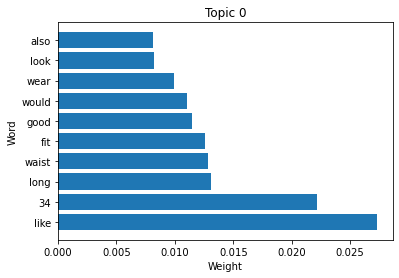

<BarContainer object of 10 artists>

Text(0.5, 1.0, 'Topic 1')

Text(0.5, 0, 'Weight')

Text(0, 0.5, 'Word')

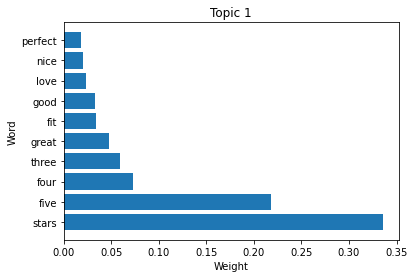

<BarContainer object of 10 artists>

Text(0.5, 1.0, 'Topic 2')

Text(0.5, 0, 'Weight')

Text(0, 0.5, 'Word')

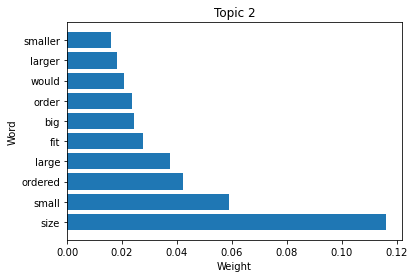

<BarContainer object of 10 artists>

Text(0.5, 1.0, 'Topic 3')

Text(0.5, 0, 'Weight')

Text(0, 0.5, 'Word')

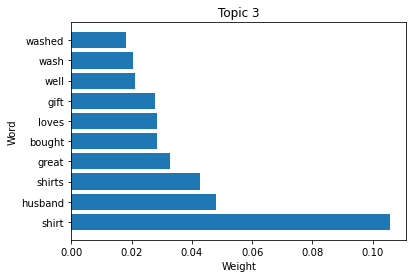

<BarContainer object of 10 artists>

Text(0.5, 1.0, 'Topic 4')

Text(0.5, 0, 'Weight')

Text(0, 0.5, 'Word')

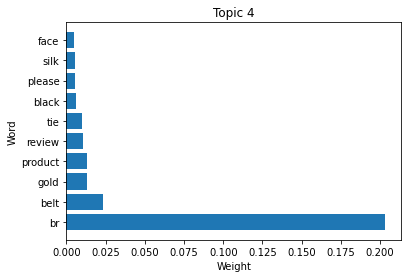

<BarContainer object of 10 artists>

Text(0.5, 1.0, 'Topic 5')

Text(0.5, 0, 'Weight')

Text(0, 0.5, 'Word')

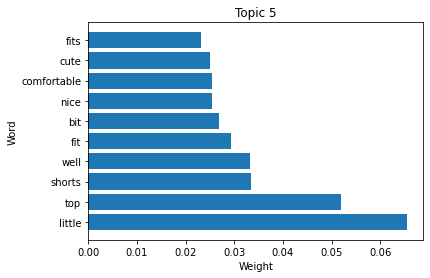

<BarContainer object of 10 artists>

Text(0.5, 1.0, 'Topic 6')

Text(0.5, 0, 'Weight')

Text(0, 0.5, 'Word')

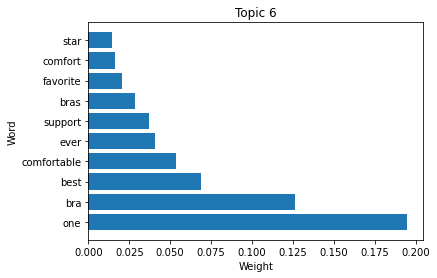

<BarContainer object of 10 artists>

Text(0.5, 1.0, 'Topic 7')

Text(0.5, 0, 'Weight')

Text(0, 0.5, 'Word')

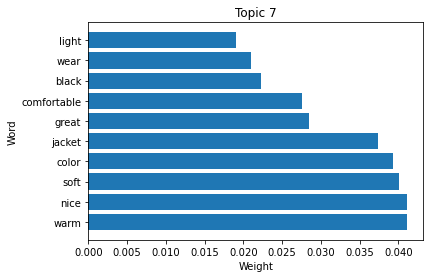

<BarContainer object of 10 artists>

Text(0.5, 1.0, 'Topic 8')

Text(0.5, 0, 'Weight')

Text(0, 0.5, 'Word')

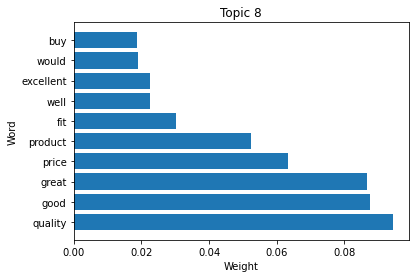

<BarContainer object of 10 artists>

Text(0.5, 1.0, 'Topic 9')

Text(0.5, 0, 'Weight')

Text(0, 0.5, 'Word')

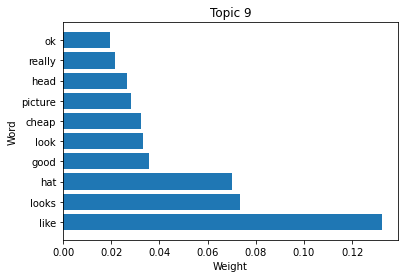

<BarContainer object of 10 artists>

Text(0.5, 1.0, 'Topic 10')

Text(0.5, 0, 'Weight')

Text(0, 0.5, 'Word')

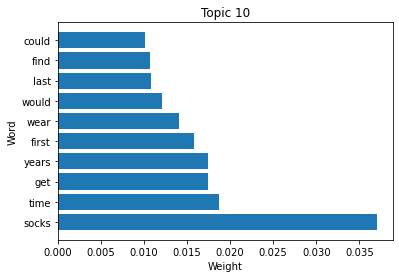

<BarContainer object of 10 artists>

Text(0.5, 1.0, 'Topic 11')

Text(0.5, 0, 'Weight')

Text(0, 0.5, 'Word')

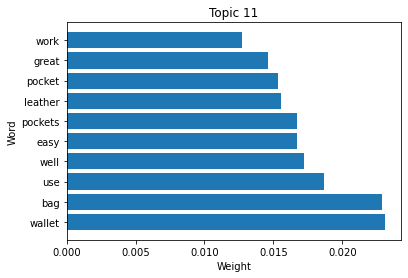

<BarContainer object of 10 artists>

Text(0.5, 1.0, 'Topic 12')

Text(0.5, 0, 'Weight')

Text(0, 0.5, 'Word')

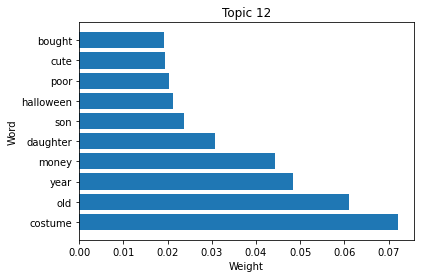

<BarContainer object of 10 artists>

Text(0.5, 1.0, 'Topic 13')

Text(0.5, 0, 'Weight')

Text(0, 0.5, 'Word')

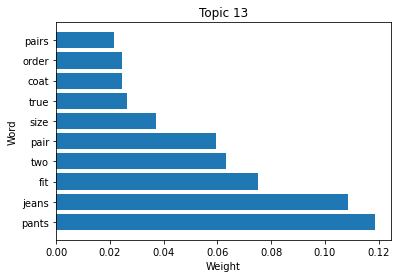

<BarContainer object of 10 artists>

Text(0.5, 1.0, 'Topic 14')

Text(0.5, 0, 'Weight')

Text(0, 0.5, 'Word')

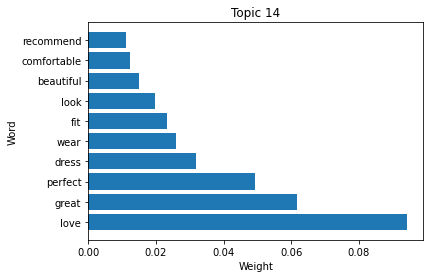

In [44]:
# Visualize the topics
for topic_id in range(num_topics):
    words = lda_model.show_topic(topic_id, topn=10)
    topic_words = [word[0] for word in words]
    topic_weights = [word[1] for word in words]
    plt.barh(topic_words, topic_weights)
    plt.title(f"Topic {topic_id}")
    plt.xlabel("Weight")
    plt.ylabel("Word")
    plt.show()

The output of the above graph is the top 15 topics that were being discussed in the reviews page of Amazon. in each and every topic I have analysed the most frequent used words by the customers. The weight on the X-axis describes the frequency of the word. 